In [8]:
import numpy as np
import pymc3 as pm
import arviz as az
import pandas as pd
import json
import urllib.request
import requests
import matplotlib.pyplot as plt
from datetime import datetime,timedelta
from IPython.core.pylabtools import figsize
import seaborn as sns

## Data preprocessing

In [9]:
def TimeTransform(time_str):
    time_obj = datetime.strptime(time_str, "%Y-%m-%d %H:%M")
    hour = time_obj.hour
    minute = time_obj.minute
    return 60*hour+minute
def Time3Hr(time_str):
    time_stamp = datetime.strptime(time_str, "%Y-%m-%d %H:%M")
    low_bound_time=time_stamp - timedelta(hours=3)
    new_time_str = low_bound_time.strftime('%Y-%m-%d %H:%M')
    return new_time_str

In [10]:
data=pd.read_csv('/kaggle/input/historyapr/EPA_OD_202304.csv')

In [11]:
url='https://data.epa.gov.tw/api/v2/aqx_p_432?api_key=e8dd42e6-9b8b-43f8-991e-b3dee723a52d&limit=1000&sort=ImportDate desc&format=CSV'
url = url.replace(" ", "%20")
data=pd.read_csv(url)
y=np.array(data["pm2.5"])

In [12]:
data.head()

,sitename,county,aqi,pollutant,status,so2,co,o3,o3_8hr,pm10,...,wind_speed,wind_direc,publishtime,co_8hr,pm2.5_avg,pm10_avg,so2_avg,longitude,latitude,siteid
0,基隆,基隆市,54.0,細懸浮微粒,普通,0.9,0.32,16.1,38.7,22,...,0.2,67,2023/06/04 09:00:00,0.2,16.0,22.0,0.0,121.760056,25.129167,1
1,汐止,新北市,51.0,細懸浮微粒,普通,0.6,0.27,30.9,38.5,17,...,0.7,255,2023/06/04 09:00:00,0.2,15.0,28.0,0.0,121.640810,25.066240,2
2,萬里,新北市,53.0,細懸浮微粒,普通,1.6,0.28,33.6,25.5,41,...,1.3,26,2023/06/04 09:00:00,0.2,16.0,30.0,0.0,121.689881,25.179667,3
3,新店,新北市,35.0,NaN,良好,0.4,0.33,24.4,30.6,16,...,0.6,200,2023/06/04 09:00:00,0.2,10.0,25.0,0.0,121.537778,24.977222,4
4,土城,新北市,40.0,NaN,良好,0.7,0.34,26.9,24.1,21,...,0.7,175,2023/06/04 09:00:00,0.3,12.0,26.0,0.0,121.451861,24.982528,5


In [13]:
data.describe()

,aqi,so2,co,o3,o3_8hr,pm10,pm2.5,no2,nox,no,co_8hr,pm2.5_avg,pm10_avg,so2_avg,longitude,latitude,siteid
count,84.00000,84.000000,85.000000,85.000000,84.000000,85.000000,84.000000,83.000000,83.000000,83.000000,84.000000,84.000000,84.000000,83.000000,85.000000,85.000000,85.000000
mean,42.72619,0.925000,0.273647,34.952941,30.208333,23.788235,12.083333,5.853012,7.985542,2.081928,0.214286,12.702381,24.607143,0.349398,120.825199,24.033080,57.400000
std,12.82632,0.561168,0.125668,7.586448,11.299922,7.716856,4.148474,4.647799,7.558022,3.221768,0.089366,4.062107,5.874219,0.504461,0.604438,1.003987,63.991108
min,21.00000,0.000000,0.140000,15.400000,7.900000,12.000000,5.000000,0.200000,0.600000,0.000000,0.100000,6.000000,14.000000,0.000000,118.312256,21.958069,1.000000
25%,32.75000,0.600000,0.200000,30.300000,21.150000,20.000000,10.000000,2.850000,3.950000,1.000000,0.200000,10.000000,21.000000,0.000000,120.345531,23.048197,22.000000
50%,41.50000,0.850000,0.240000,35.100000,30.800000,22.000000,11.000000,4.800000,5.900000,1.400000,0.200000,12.000000,24.000000,0.000000,120.685306,24.131672,43.000000
75%,51.25000,1.200000,0.300000,39.200000,38.350000,27.000000,14.000000,7.600000,9.400000,2.050000,0.200000,15.250000,27.250000,1.000000,121.432500,25.001327,65.000000
max,90.00000,3.200000,0.870000,62.800000,67.500000,57.000000,31.000000,26.500000,49.700000,23.200000,0.600000,25.000000,46.000000,2.000000,121.792928,26.151884,313.000000


In [14]:
# data["PublishTime"].describe()

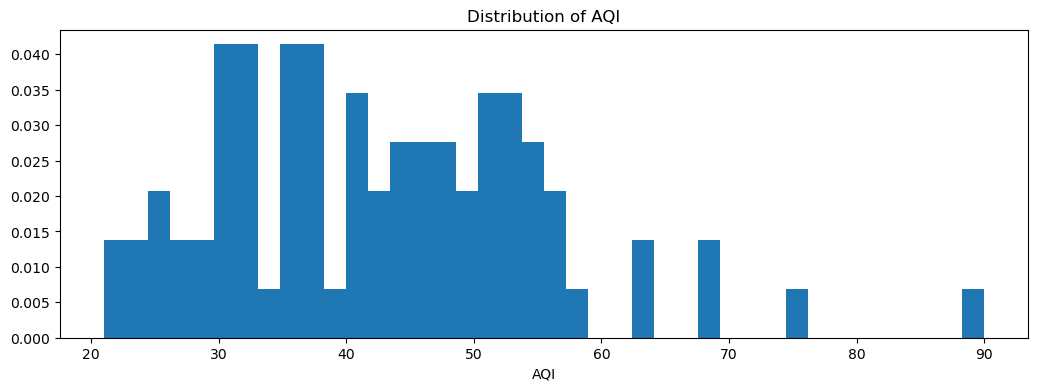

In [15]:
figsize(12.5, 4)
plt.hist(data['aqi'], bins=40, density=True, label='AQI')
plt.xlabel('AQI')
plt.title('Distribution of AQI')
plt.savefig('Distribution of AQI')
plt.show()

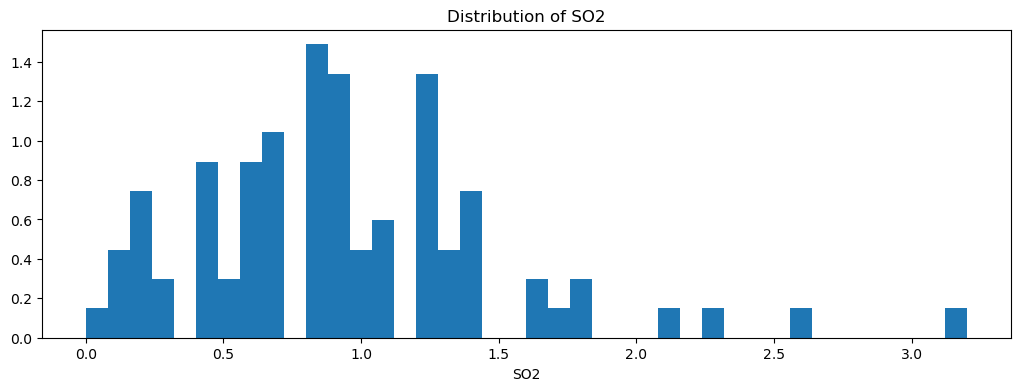

In [16]:
figsize(12.5, 4)
plt.hist(data['so2'], bins=40, density=True, label='SO2')
plt.xlabel('SO2')
plt.title('Distribution of SO2')
plt.savefig('Distribution of SO2')
plt.show()

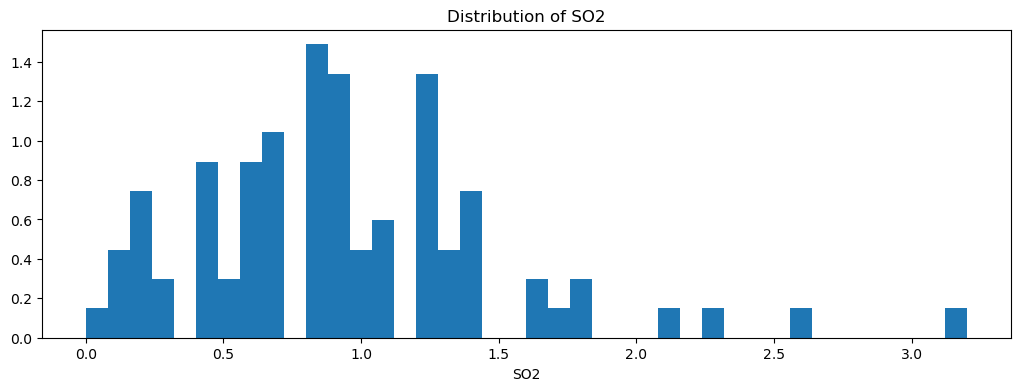

In [17]:
figsize(12.5, 4)
plt.hist(data['so2'], bins=40, density=True, label='SO2')
plt.xlabel('SO2')
plt.title('Distribution of SO2')
plt.savefig('Distribution of SO2')
plt.show()

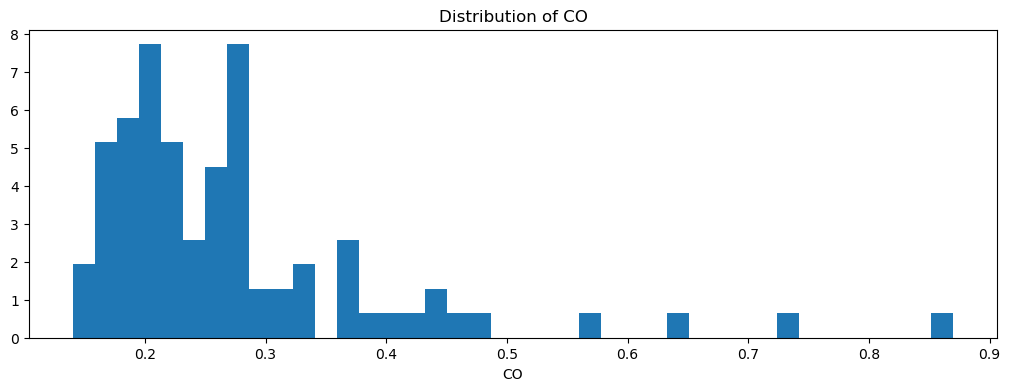

In [18]:
figsize(12.5, 4)
plt.hist(data['co'], bins=40, density=True, label='CO')
plt.xlabel('CO')
plt.title('Distribution of CO')
plt.savefig('Distribution of CO')
plt.show()

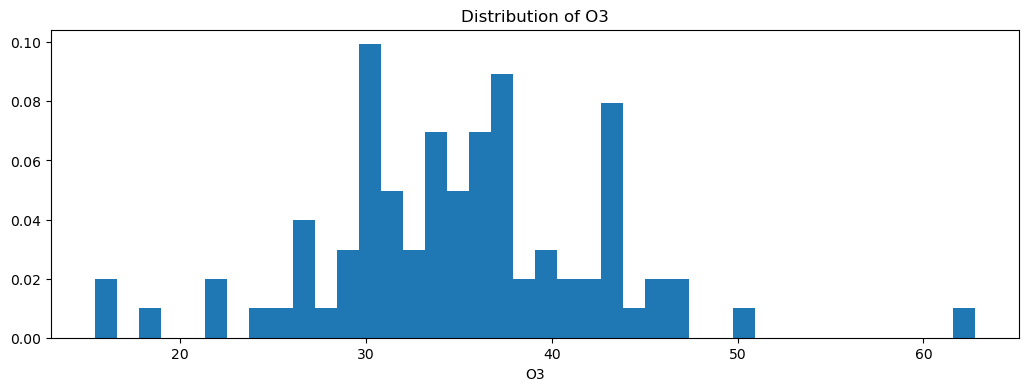

In [19]:
figsize(12.5, 4)
plt.hist(data['o3'], bins=40, density=True, label='O3')
plt.xlabel('O3')
plt.title('Distribution of O3')
plt.savefig('Distribution of O3')
plt.show()

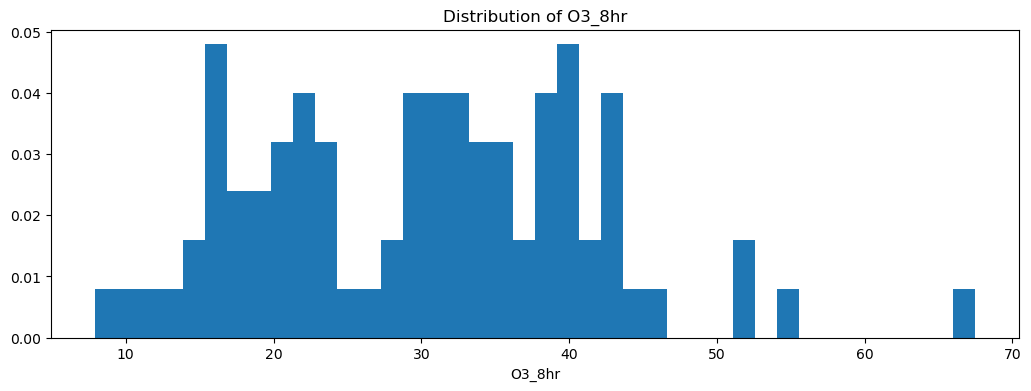

In [20]:
figsize(12.5, 4)
plt.hist(data['o3_8hr'], bins=40, density=True, label='O3_8hr')
plt.xlabel('O3_8hr')
plt.title('Distribution of O3_8hr')
plt.savefig('Distribution of O3_8hr')
plt.show()

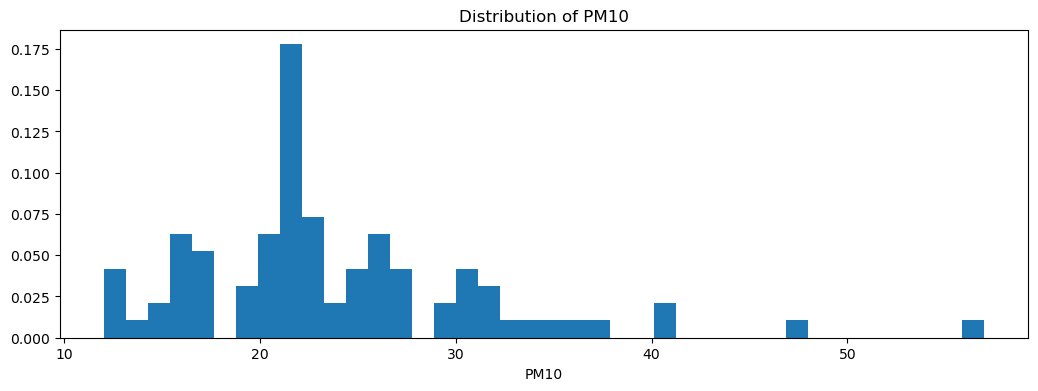

In [21]:
figsize(12.5, 4)
plt.hist(data['pm10'], bins=40, density=True, label='pm10')
plt.xlabel('PM10')
plt.title('Distribution of PM10')
plt.savefig('Distribution of PM10')
plt.show()

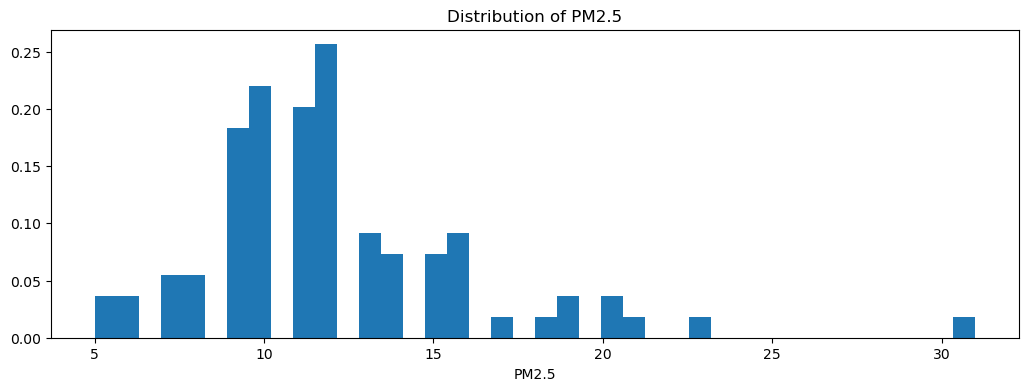

In [22]:
figsize(12.5, 4)
plt.hist(data['pm2.5'], bins=40, density=True, label='pm2.5')
plt.xlabel('PM2.5')
plt.title('Distribution of PM2.5')
plt.savefig('Distribution of PM2.5.png')
plt.show()

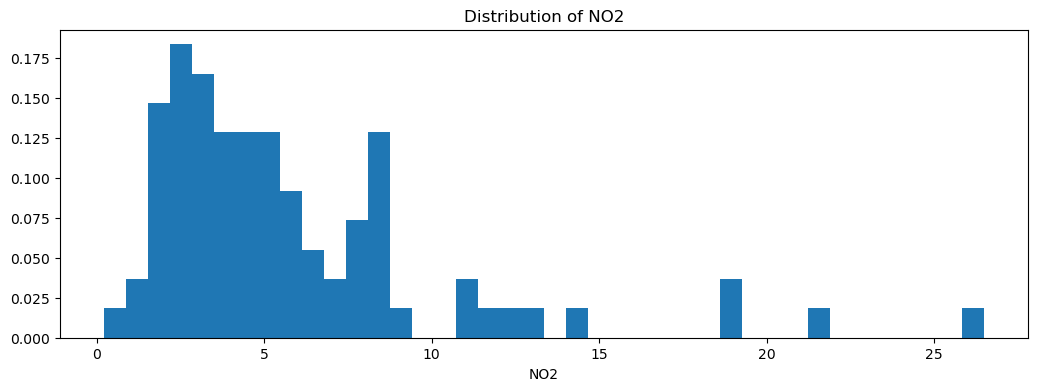

In [23]:
figsize(12.5, 4)
plt.hist(data['no2'], bins=40, density=True, label='no2')
plt.xlabel('NO2')
plt.title('Distribution of NO2')
plt.savefig('Distribution of NO2')
plt.show()

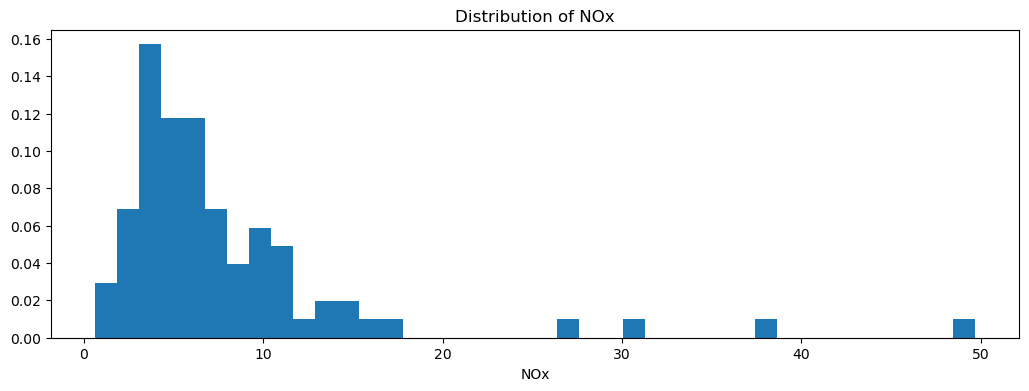

In [24]:
figsize(12.5, 4)
plt.hist(data['nox'], bins=40, density=True, label='nox')
plt.xlabel('NOx')
plt.title('Distribution of NOx')
plt.savefig('Distribution of NOx')
plt.show()

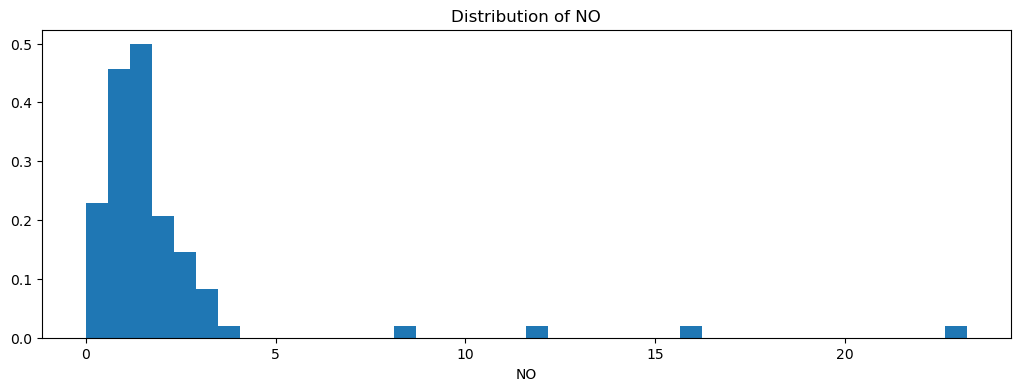

In [25]:
figsize(12.5, 4)
plt.hist(data['no'], bins=40, density=True, label='no')
plt.xlabel('NO')
plt.title('Distribution of NO')
plt.savefig('Distribution of NO')
plt.show()

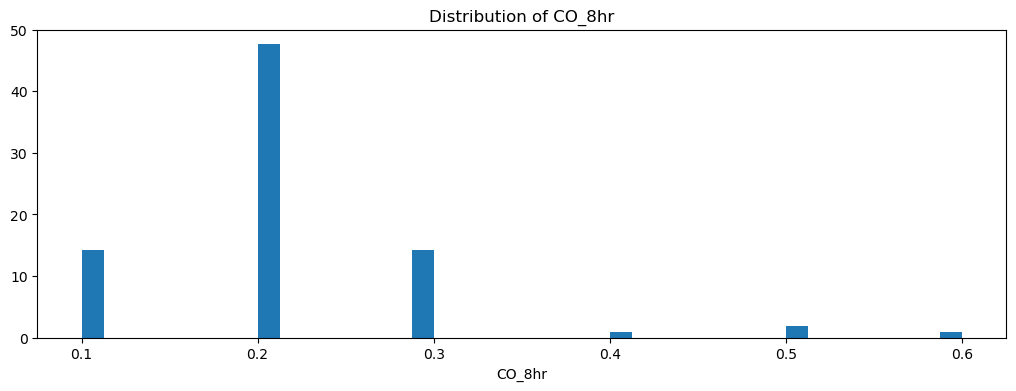

In [26]:
figsize(12.5, 4)
plt.hist(data['co_8hr'], bins=40, density=True, label='co_8hr')
plt.xlabel('CO_8hr')
plt.title('Distribution of CO_8hr')
plt.savefig('Distribution of CO_8hr')
plt.show()

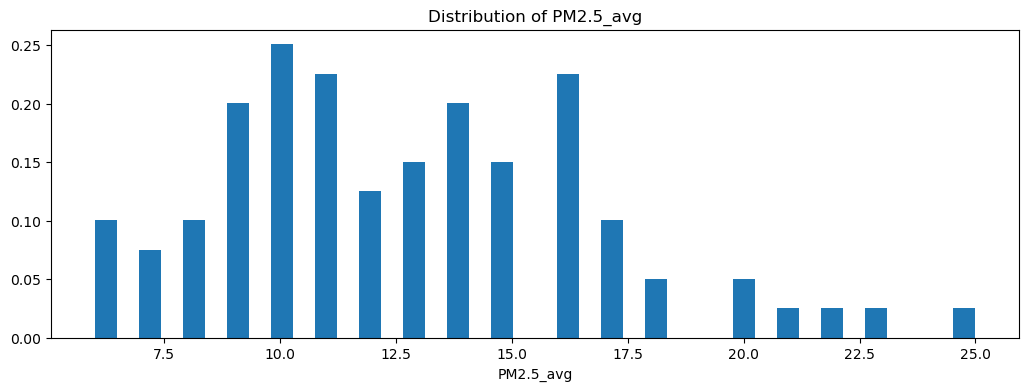

In [27]:
figsize(12.5, 4)
plt.hist(data['pm2.5_avg'], bins=40, density=True, label='pm2.5_avg')
plt.xlabel('PM2.5_avg')
plt.title('Distribution of PM2.5_avg')
plt.savefig('Distribution of PM2.5_avg.png')
plt.show()

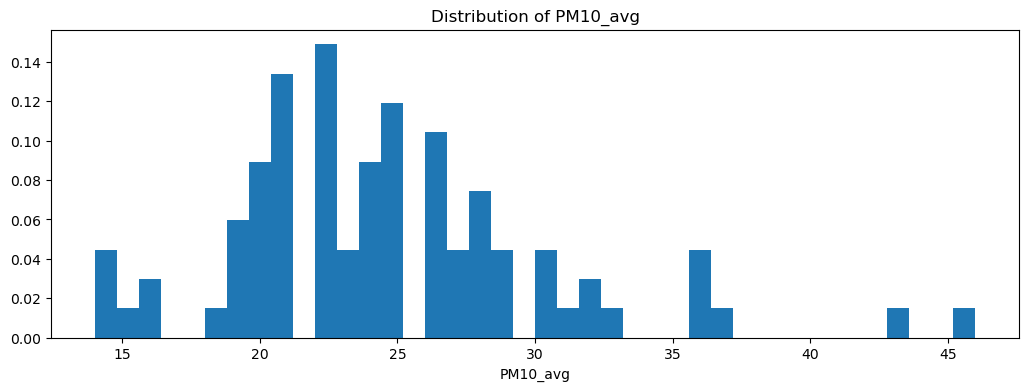

In [28]:
figsize(12.5, 4)
plt.hist(data['pm10_avg'], bins=40, density=True, label='pm10_avg')
plt.xlabel('PM10_avg')
plt.title('Distribution of PM10_avg')
plt.savefig('Distribution of PM10_avg.png')
plt.show()

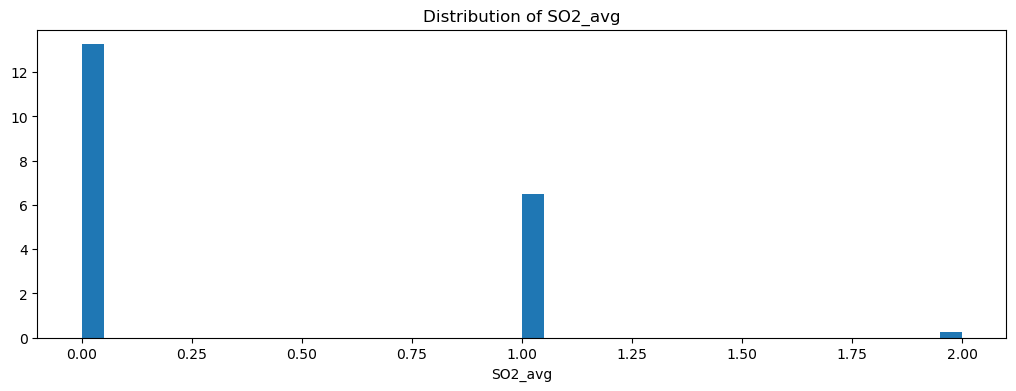

In [29]:
figsize(12.5, 4)
plt.hist(data['so2_avg'], bins=40, density=True, label='so2_avg')
plt.xlabel('SO2_avg')
plt.title('Distribution of SO2_avg')
plt.savefig('Distribution of SO2_avg.png')
plt.show()

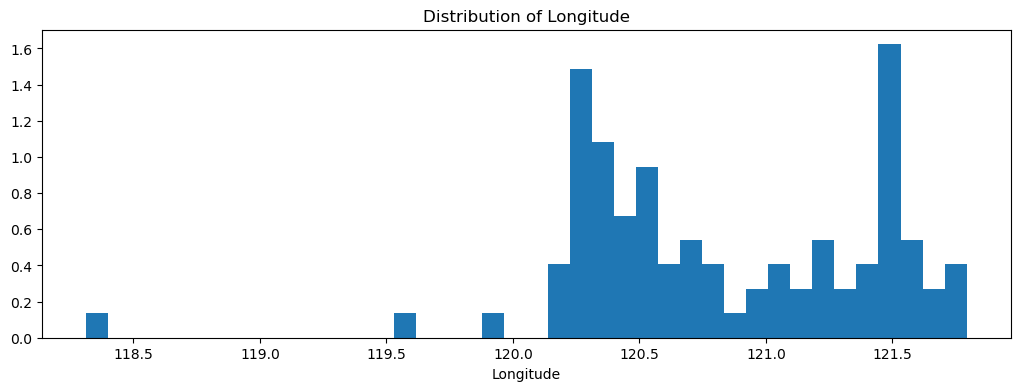

In [30]:
figsize(12.5, 4)
plt.hist(data['longitude'], bins=40, density=True, label='longitude')
plt.xlabel('Longitude')
plt.title('Distribution of Longitude')
plt.savefig('Distribution of Longitude')
plt.show()

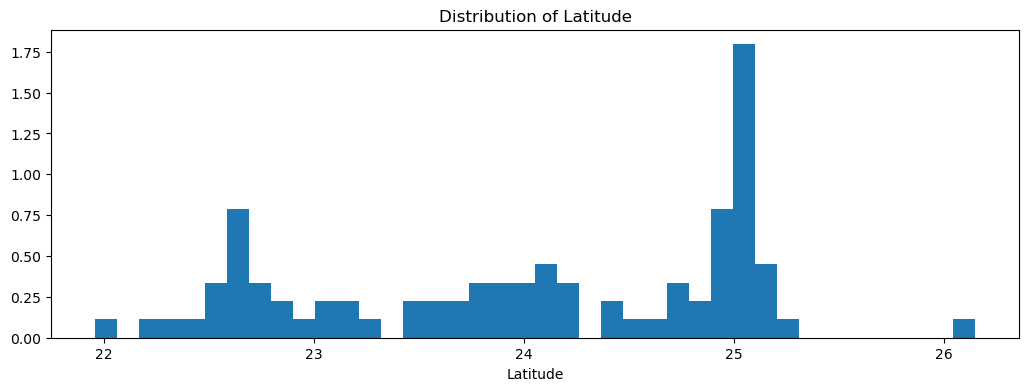

In [31]:
figsize(12.5, 4)
plt.hist(data['latitude'], bins=40, density=True, label='latitude')
plt.xlabel('Latitude')
plt.title('Distribution of Latitude')
plt.savefig('Distribution of Latitude')
plt.show()

In [38]:
ax=sns.pairplot(data,kind='scatter')
fig = ax.fig
fig.savefig("ALL-Correlation.png") 

TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 were given

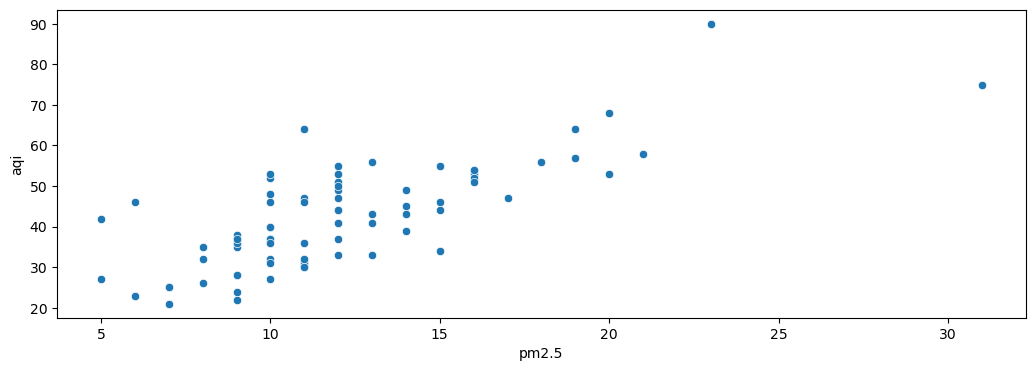

In [47]:
ax=sns.scatterplot(data,x="pm2.5",y="aqi")
fig = ax.get_figure()
fig.savefig("aqi.png") 

In [33]:
data.corr()

,aqi,so2,co,o3,o3_8hr,pm10,pm2.5,no2,nox,no,co_8hr,pm2.5_avg,pm10_avg,so2_avg,longitude,latitude,siteid
aqi,1.000000,0.046883,0.432231,0.203735,0.677130,0.454031,0.751639,0.413411,0.365886,0.260678,0.470147,0.967556,0.636108,0.158680,0.110897,0.688709,-0.126061
so2,0.046883,1.000000,0.052005,0.062822,-0.019579,0.201572,0.125678,0.148322,0.127691,0.085192,0.114260,0.116816,0.103952,0.379268,-0.282079,-0.067968,-0.025540
co,0.432231,0.052005,1.000000,-0.382493,0.176104,0.288186,0.305550,0.884802,0.887874,0.805321,0.895495,0.487274,0.336933,0.168320,0.396023,0.497736,-0.036808
o3,0.203735,0.062822,-0.382493,1.000000,0.466132,0.032160,0.194799,-0.488320,-0.510473,-0.495989,-0.221859,0.107014,0.053200,0.033765,-0.402035,0.086155,-0.100088
o3_8hr,0.677130,-0.019579,0.176104,0.466132,1.000000,0.250660,0.491648,0.134805,0.089950,0.015071,0.230387,0.583152,0.260859,0.071000,0.107152,0.605642,-0.178283
pm10,0.454031,0.201572,0.288186,0.032160,0.250660,1.000000,0.600727,0.320476,0.290216,0.220559,0.310764,0.430047,0.731702,-0.079482,-0.183698,0.158778,0.216012
pm2.5,0.751639,0.125678,0.305550,0.194799,0.491648,0.600727,1.000000,0.346044,0.275811,0.112342,0.315873,0.761740,0.544364,0.017277,-0.128486,0.391791,0.085470
no2,0.413411,0.148322,0.884802,-0.488320,0.134805,0.320476,0.346044,1.000000,0.973124,0.840555,0.793307,0.475705,0.331822,0.068959,0.303611,0.403341,-0.056295
nox,0.365886,0.127691,0.887874,-0.510473,0.089950,0.290216,0.275811,0.973124,1.000000,0.942662,0.797246,0.427585,0.284545,0.092582,0.289831,0.341667,-0.054996
no,0.260678,0.085192,0.805321,-0.495989,0.015071,0.220559,0.112342,0.840555,0.942662,1.000000,0.724806,0.315227,0.188431,0.117330,0.243872,0.220115,-0.046223


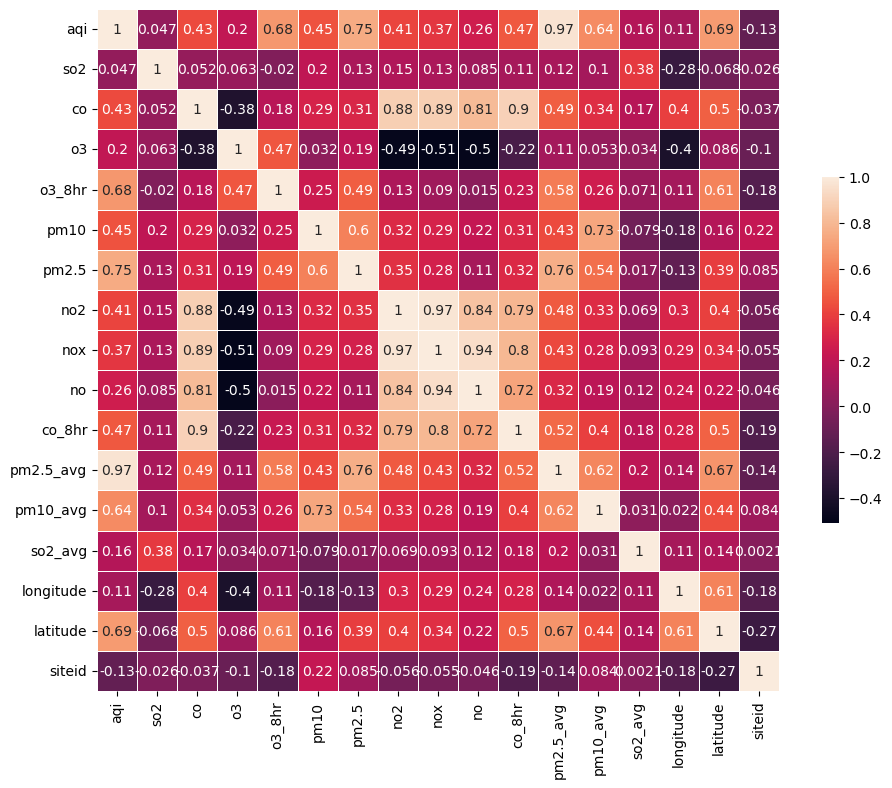

In [34]:
# cols=[2,5,6,7,8,9,10,11,12,13,17,18,19,20,21,22]
corr=data.corr()
# mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Draw the heatmap with the mask and correct aspect ratio
ax=sns.heatmap(corr,
            square=True, annot=True,linewidths=.5, cbar_kws={"shrink": .5})
# fig = ax.fig
plt.savefig("Feature-HeatMap.png") 